# Analysis Functions

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind_from_stats

from src.utilities import (
    completion_at_time, 
    time_to_seconds,
    get_average_curve,
    get_triplicates_jackknife)
from src.modeling import (
    residuals,
    fit_model,
    model_one_step
)
from src.statistics import (
    wald_z,
    holm_correction
)
#Standardized color scheme for plotting
color_scheme = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                               "#312725", '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Importing data

In [2]:
data_dir = "Data/"

nat_noinc = pd.read_csv(data_dir + 'UW_Multiiso_NoInc.csv')
conditions_nat_noinc = {'control' : ['E3', 'F3', 'G3'],
'baseline' : ['E2', 'F2', 'G2'],
'N50_25uM' : ['E5', 'F5', 'G5']}
offset_nat_noinc = 140
x_nat_noinc = nat_noinc['Time'].apply(time_to_seconds).values

nn1_noinc = pd.read_csv(data_dir + 'UW_Multiiso_NoInc.csv')
conditions_nn1_noinc = {'control' : ['E7', 'F7', 'G7'],
'baseline' : ['E6', 'F6', 'G6'],
'N50_25uM' : ['E9', 'F9', 'G9']}
offset_nn1_noinc = 140
x_nn1_noinc = np.array(nn1_noinc['Time'].apply(time_to_seconds).values)



nn2v1_noinc = pd.read_csv(data_dir + 'UW_Multiiso_NoInc.csv')
conditions_nn2v1_noinc = {'control' : ['E11', 'F11', 'G11'],
'baseline' : ['E10', 'F10', 'G10'],
'N50_25uM' : ['E13', 'F13', 'G13']}
offset_nn2v1_noinc = 140
x_nn2v1_noinc = np.array(nn2v1_noinc['Time'].apply(time_to_seconds).values)

nn2v2_noinc = pd.read_csv(data_dir + 'UW_Multiiso_NN2close_NoInc.csv')
conditions_nn2v2_noinc = {'control': ['K3', 'L3', 'M3'],
                         'baseline' : ['K2', 'L2', 'M2'],
'N50_25uM': ['K4', 'L4', 'M4']}
offset_nn2v2_noinc = 140
x_nn2v2_noinc = nn2v2_noinc['Time'].apply(time_to_seconds)
nat_trig = pd.read_csv(data_dir + 'UW_Multiiso_TrigInc.csv')
conditions_nat_trig = {'control' : ['H3', 'I3', 'J3'],
'baseline' : ['H2', 'I2', 'J2'],
'N50_25uM' : ['H5', 'I5', 'J5']}
offset_nat_trig = 140
x_nat_trig = np.array(nat_trig['Time'].apply(time_to_seconds).values)

nn1_trig = pd.read_csv(data_dir + 'UW_Multiiso_TrigInc.csv')
conditions_nn1_trig = {'control' : ['H7', 'I7', 'J7'],
                      'baseline' : ['H6', 'I6', 'J6'],
                      'N50_25uM' : ['H9', 'I9', 'J9']}
offset_nn1_trig = 140
x_nn1_trig = np.array(nn1_trig['Time'].apply(time_to_seconds).values)


nn2v1_trig = pd.read_csv(data_dir + 'UW_Multiiso_TrigInc.csv')
conditions_nn2v1_trig = {'control' : ['H11', 'I11', 'J11'],
                        'baseline' : ['H10', 'I10', 'J10'],
                        'N50_25uM' : ['H13', 'I13', 'J13']}
offset_nn2v1_trig = 140
x_nn2v1_trig = np.array(nn2v1_trig['Time'].apply(time_to_seconds).values)

nn2v2_trig = pd.read_csv(data_dir + 'UW_Multiiso_NN2close_TrigInc.csv')

conditions_nn2v2_trig = {'control': ['K6','L6', 'M6',],
                         'baseline' : ['K5', 'L5', 'M5'],
                          
                          'N50_25uM': ['K8', 'L8', 'M8']}
offset_nn2v2_trig = 170
x_nn2v2_trig = np.array(nn2v2_trig['Time'].apply(time_to_seconds).values)

# Bimolecular fits

--------------Natural
no incubation----------------


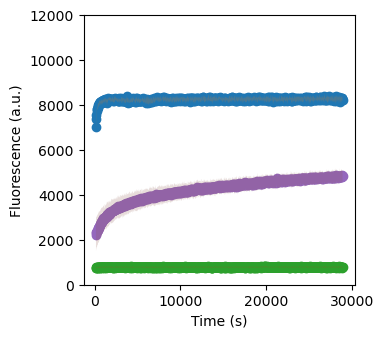

Fit parameters: Background = 768.5333333333334, Scale = 375.0966666666667
-----------------------------------



--------------1 isoC
no incubation----------------


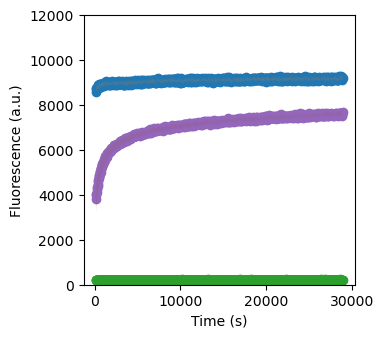

Fit parameters: Background = 209.9, Scale = 449.325
-----------------------------------



--------------2 isoC (close)
no incubation----------------


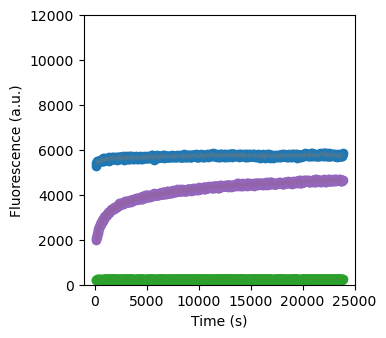

Fit parameters: Background = 228.2, Scale = 277.02
-----------------------------------



--------------2 isoC (far)
no incubation----------------


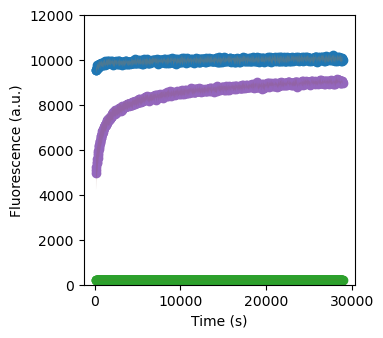

Fit parameters: Background = 204.3, Scale = 491.8133333333334
-----------------------------------



--------------Natural
trigger incubated----------------


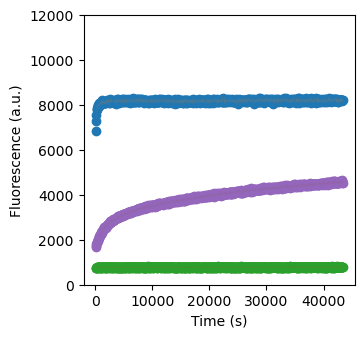

Fit parameters: Background = 764.1333333333333, Scale = 372.56000000000006
-----------------------------------



--------------1 isoC
trigger incubated----------------


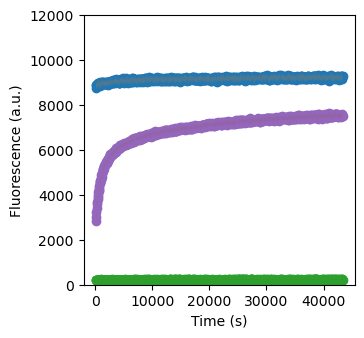

Fit parameters: Background = 216.56666666666666, Scale = 451.14333333333326
-----------------------------------



--------------2 isoC (close)
trigger incubated----------------


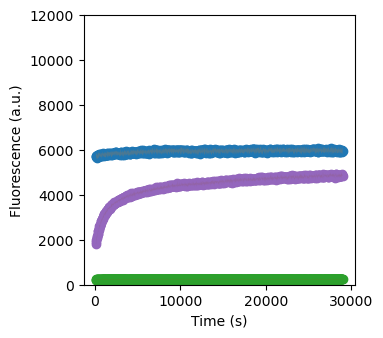

Fit parameters: Background = 231.56666666666666, Scale = 286.43333333333334
-----------------------------------



--------------2 isoC (far)
trigger incubated----------------


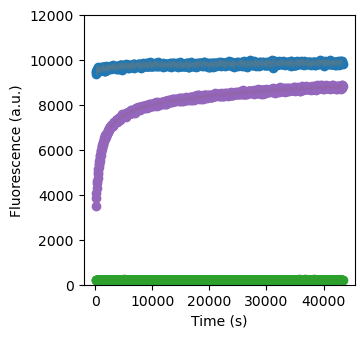

Fit parameters: Background = 207.4666666666667, Scale = 483.8083333333334
-----------------------------------





In [3]:
data = [nat_noinc, nn1_noinc, nn2v2_noinc, nn2v1_noinc,
        nat_trig, nn1_trig, nn2v2_trig, nn2v1_trig]
conditions = [conditions_nat_noinc, conditions_nn1_noinc, conditions_nn2v2_noinc, conditions_nn2v1_noinc,
              conditions_nat_trig, conditions_nn1_trig, conditions_nn2v2_trig, conditions_nn2v1_trig]
offset = [offset_nat_noinc, offset_nn1_noinc, offset_nn2v2_noinc, offset_nn2v1_noinc,
          offset_nat_trig, offset_nn1_trig, offset_nn2v2_trig, offset_nn2v1_trig]
t = [x_nat_noinc, x_nn1_noinc, x_nn2v2_noinc, x_nn2v1_noinc,
     x_nat_trig, x_nn1_trig, x_nn2v2_trig, x_nn2v1_trig]
case_names = ['Natural\nno incubation', '1 isoC\nno incubation',  '2 isoC (close)\nno incubation', '2 isoC (far)\nno incubation',
              'Natural\ntrigger incubated', '1 isoC\ntrigger incubated',  '2 isoC (close)\ntrigger incubated', '2 isoC (far)\ntrigger incubated']
fits = []
#plotting unnormalized kinetic curves for each case
for i, case in enumerate(case_names):
        print(f"--------------{case}----------------")
        fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5))
        for level in conditions[i].keys():
                x, y, std = get_average_curve(0, offset[i], level, t[i], data[i], conditions[i], (0,1))
                x = np.array(x)
                y = np.array(y)
                std = np.array(std)
                ax.scatter(x, y)
                ax.fill_between(x, y-std, y+std, alpha=0.2)
                ax.set_ylim(0, 12000)
        baseline = list(conditions[i].keys())[1]
        triggered = list(conditions[i].keys())[0]
        b = np.average(get_average_curve(0, offset[i], baseline, t[i], data[i], conditions[i], (0,1))[1][0:10])
        m = (np.average(get_average_curve(0, offset[i], triggered, t[i], data[i], conditions[i], (0,1))[1][-10:]) - b)/20
        fits.append((b, m))
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Fluorescence (a.u.)')
        plt.show()
        print(f"Fit parameters: Background = {b}, Scale = {m}")
        print("-----------------------------------")
        print("\n\n")

Fitted kf = 1.5e+03 ± 1.9e+02 (jackknife SE, n=3)


/Users/cse-loaner/Documents/Thachuk-Lab/Projects/ThomasMayerVisit2022/NAR_Analysis_Code/src/modeling.py:38: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  y1 = [i[0] for i in odeint(onestep_model, y0, t, args=(kf, scale), rtol = 1e-12, atol = 1e-12)]


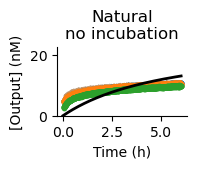

RMSE = 2.480e+00
nRMSE (normed by mean)  = 0.283



Fitted kf = 6.6e+03 ± 4.1e+02 (jackknife SE, n=3)


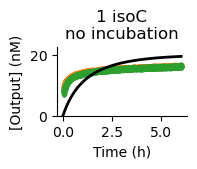

RMSE = 3.206e+00
nRMSE (normed by mean)  = 0.215



Fitted kf = 5.2e+03 ± 3.8e+02 (jackknife SE, n=3)


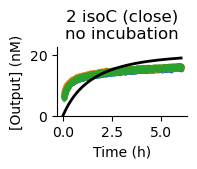

RMSE = 2.911e+00
nRMSE (normed by mean)  = 0.205



Fitted kf = 1.7e+04 ± 3.4e+03 (jackknife SE, n=3)


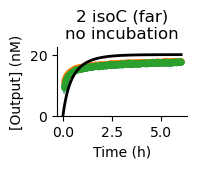

RMSE = 2.672e+00
nRMSE (normed by mean)  = 0.161



Fitted kf = 1.1e+03 ± 6.5e+00 (jackknife SE, n=3)


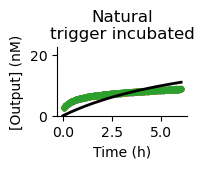

RMSE = 1.910e+00
nRMSE (normed by mean)  = 0.267



Fitted kf = 4.8e+03 ± 1.3e+02 (jackknife SE, n=3)


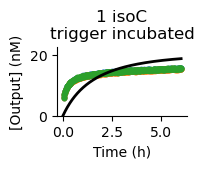

RMSE = 3.046e+00
nRMSE (normed by mean)  = 0.218



Fitted kf = 5.1e+03 ± 1.1e+02 (jackknife SE, n=3)


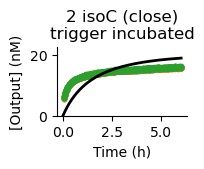

RMSE = 2.838e+00
nRMSE (normed by mean)  = 0.200



Fitted kf = 8.8e+03 ± 9.0e+01 (jackknife SE, n=3)


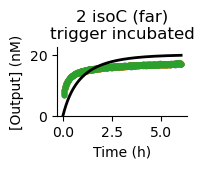

RMSE = 2.772e+00
nRMSE (normed by mean)  = 0.177





In [4]:
k_fit = []
for ind in range(len(case_names)):
    number_of_points = min([index for index, ti in enumerate(t[ind]) if ti >= 3600*6])
    data_UW = data[ind][0:number_of_points]
    conditions_UW = conditions[ind]
    offset_UW = offset[ind]
    t_UW = t[ind][0:number_of_points]
    fit = fits[ind]
    start = time_to_seconds("0:00:00")
    x = np.array(t_UW)
    levels = list(conditions_UW.keys())[2:]  # Skip 'control' and 'baseline'
    format_dict = {'point_size': 10, 'point_opacity': 1, 'fill_opacity': 0.8}

    curves = []
    stdDev = []

    for level in levels:
        x_jk, curves_jk, stds_jk = get_triplicates_jackknife(start, offset_UW, level, x, data_UW, conditions_UW, fit)
        curves.append([x_jk, [np.array(c) for c in curves_jk]])
        stdDev.append(stds_jk)

    to_fit = [c[1] for c in curves]
    x_trunc = np.array(curves[0][0])
    
    x_h = x/3600
    x_th = x_trunc/3600

    # Initial parameters
    y_init = [
        0.0,   # P
        20.0,  # Y1
        0.0,   # W
    ]
    scale = 40

    fixed_params_list = [
        {'y0': y_init, 'scale': scale}
    ]

    initial_k = 2e5
    x_list = [x_trunc]

    res = []
    for curve in to_fit[0]:
        k_hat = fit_model(model_one_step, x_list, [curve], initial_k, fixed_params_list)[0][0]
        res.append(k_hat)

    res = np.array(res, dtype=float)
    n = len(res)
    kf_mean = res.mean()

    # JACKKNIFE SE: sqrt((n-1)/n * sum (θ_i - θ_bar)^2)
    kf_se = np.sqrt((n - 1) / n * np.sum((res - kf_mean)**2))

    print(f"Fitted kf = {kf_mean:.1e} ± {kf_se:.1e} (jackknife SE, n={n})")

    k_fit.append([kf_mean, kf_se])

    
    
    # --- plotting ---
    fig, ax = plt.subplots(1, 1, figsize = (6.5/4,1.25))
    fig.subplots_adjust(hspace=0.5)
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.75)

    alph = 0.5
    size = 5
    line = 2

    for i, rep in enumerate(to_fit[0]):
        y_nM = [v for v in rep]
        ax.scatter(x_th, y_nM, color=color_scheme[i], s=10)
        ax.fill_between(x_th,
                        np.array(y_nM) - np.array(stdDev[0][i]),
                        np.array(y_nM),
                        color=color_scheme[i], alpha=alph)
        ax.fill_between(x_th,
                        np.array(y_nM),
                        np.array(y_nM) + np.array(stdDev[0][i]),
                        color=color_scheme[i], alpha=alph)

    x_sim = np.linspace(0, x_trunc[-1], number_of_points)
    x_sim_h = x_sim/3600
    ax.plot(x_sim_h, [v for v in model_one_step(kf_mean, x_sim, fixed_params_list[0])],
            'black', linewidth=line)

    ax.set_ylim(0, 22.5)
    ax.set_xlabel('Time (h)')
    ax.set_title(f"{case_names[ind]}")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylabel('[Output] (nM)')
    
    plt.savefig(f"Figures/{case_names[ind].replace('\n', '_')}.svg", dpi=400)
    plt.show()
    
    # Calculating mean normalized RMSE for each condition
    nrep = len(to_fit[0])
    t_i = [x_trunc] * nrep
    fixed_i = [fixed_params_list[0]] * nrep   # replicate the dict for each curve
    r = residuals(kf_mean, model_one_step, t_i, to_fit[0], fixed_i)
    RMSE = np.sqrt(np.mean(r**2))
    y_all = np.concatenate(to_fit[0])
    nRMSE_mean  = RMSE / y_all.mean()
    print(f"RMSE = {RMSE:.3e}")
    print(f"nRMSE (normed by mean)  = {nRMSE_mean:.3f}")
    
    print("\n\n")
    



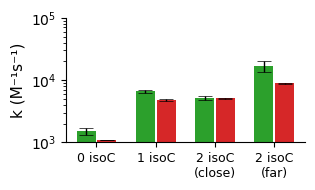

Wald Z tests: Trig vs NoInc (Holm corrected)
0 isoC: Z = -2.199, raw p = 0.0279, Holm p = 0.0558
1 isoC: Z = -4.221, raw p = 2.431e-05, Holm p = 9.725e-05
2 isoC
(close): Z = -0.174, raw p = 0.8618, Holm p = 0.8618
2 isoC
(far): Z = -2.433, raw p = 0.01496, Holm p = 0.04489

Omnibus Wald Z tests between pooled incubation conditions (with Holm correction)
N: Z = 30.9214, raw p = 0.0000 Holm p = 0.0000
1: Z = 0.9735, raw p = 0.3303 Holm p = 0.3303
1: Z = 25.6256, raw p = 0.0000 Holm p = 0.0000


In [5]:


# --- labels for the 4 base conditions (shared by NoInc and Trig) ---
x_labels = ['0 isoC', '1 isoC', '2 isoC\n(close)', '2 isoC\n(far)']
x = np.arange(len(x_labels))
bar_width = 0.35

# --- extract means/SEs from k_fit, assuming case_names order you showed ---
kf_mean = np.array([v[0] for v in k_fit], dtype=float)
kf_se   = np.array([v[1] for v in k_fit], dtype=float)

no_mean = kf_mean[0:4]
no_se   = kf_se[0:4]
tr_mean = kf_mean[4:8]
tr_se   = kf_se[4:8]

fig, ax = plt.subplots(figsize=(3.25, 2))

error_params = dict(ecolor='black', lw=1, capsize=5, capthick=0.5)

alpha_val = 1.0
width_adj = bar_width * 0.92
offset_scale = 0.00
offset = 0.0  # since offset_scale=0.00 in your example

# Draw NoInc (left)
ax.bar(x - bar_width/2 + offset, no_mean, width_adj, yerr=no_se,
       color=color_scheme[2], alpha=alpha_val, error_kw=error_params)

# Draw Trig (right)
ax.bar(x + bar_width/2 + offset, tr_mean, width_adj, yerr=tr_se,
       color=color_scheme[3], alpha=alpha_val, error_kw=error_params)

# X and Y axis formatting (match your style)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=9)

ax.set_ylabel("k (M⁻¹s⁻¹)", fontsize=11)
ax.set_ylim(1e3, 1e5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_yscale('log')

plt.tight_layout()
plt.savefig("Figures/kf_multiiso.svg", dpi=400)
plt.show()


# Wald Z tests: Trig vs NoInc within each condition + Holm correction
print("Wald Z tests: Trig vs NoInc (Holm corrected)")

raw_pvals = []
zs = []

for i in range(4):
    diff = tr_mean[i] - no_mean[i]
    se_diff = np.sqrt(tr_se[i]**2 + no_se[i]**2)   # SE propagation for difference
    Z, p = wald_z(diff, se_diff)
    zs.append(Z)
    raw_pvals.append(p)

adj_pvals = holm_correction(raw_pvals)

for i in range(4):
    print(f"{x_labels[i]}: Z = {zs[i]:.3f}, raw p = {raw_pvals[i]:.4g}, Holm p = {adj_pvals[i]:.4g}")


print("\nOmnibus Wald Z tests between pooled incubation conditions (with Holm correction)")

# pull means/SEs from k_fit,
# case_names = ['Nat_NoInc', 'NN1_NoInc', 'NN2v2_NoInc', 'NN2v1_NoInc',
#               'Nat_Trig',  'NN1_Trig',  'NN2v2_Trig',  'NN2v1_Trig']


kf_mean = np.array([v[0] for v in k_fit], dtype=float)
mean_array = np.array(kf_mean).reshape(2,4)  # 2 rows (NoInc, Trig), 4 columns (conditions)

kf_se   = np.array([v[1] for v in k_fit], dtype=float)
se_array = np.array(kf_se).reshape(2,4)  # 2 rows (NoInc, Trig), 4 columns (conditions)

diff_no_one = (mean_array[:, 1] - mean_array[:, 0]).reshape(2,1)
diff_one_close = (mean_array[:, 2] - mean_array[:, 1]).reshape(2,1)
diff_one_far = (mean_array[:, 3] - mean_array[:, 1]).reshape(2,1)

var_diff_no_one = (se_array[:, 1]**2 + se_array[:, 0]**2).reshape(2,1)
var_diff_one_close = (se_array[:, 2]**2 + se_array[:, 1]**2).reshape(2,1)
var_diff_one_far = (se_array[:, 3]**2 + se_array[:, 1]**2).reshape(2,1)

w_no_one = 1 / var_diff_no_one
w_one_close = 1 / var_diff_one_close
w_one_far = 1 / var_diff_one_far



var_no_one = 1/np.sum(w_no_one, axis = 0)
var_one_close = 1/np.sum(w_one_close, axis = 0)
var_one_far = 1/np.sum(w_one_far, axis = 0)


no_one = np.sum(w_no_one * diff_no_one, axis=0)*var_no_one
one_close = np.sum(w_one_close * diff_one_close, axis=0)*var_one_close
one_far = np.sum(w_one_far * diff_one_far, axis=0)*var_one_far

SE_no_one = np.sqrt(var_no_one)
SE_one_close = np.sqrt(var_one_close)
SE_one_far = np.sqrt(var_one_far)

pairs = [(no_one, SE_no_one), (one_close, SE_one_close), (one_far, SE_one_far)]
Z = []
p = []
for diff, se in pairs:
    z, pval = wald_z(diff, se)
    Z.append(z)
    p.append(pval)


labels = ["No isoC vs 1 isoC", "1 isoC vs 2 isoC (close)", "1 isoC vs 2 isoC (far)"]
adj_pvals = holm_correction(p)
for i, p_adj in enumerate(adj_pvals):
    print(f"{labels[i][0]}: Z = {Z[i][0]:.4f}, raw p = {p[i][0]:.4f} Holm p = {p_adj[0]:.4f}")

# 6H completion

In [6]:
time_points = np.array([6])*3600


both_no_inc = []
both_trig_inc = []
for time_point in time_points:
  t = [offset_nat_noinc + time_to_seconds(i) for i in list(nat_noinc['Time'].values)]
  nat_noinc_N50_25uM = completion_at_time(nat_noinc, nat_noinc, t, time_point, conditions_nat_noinc, conditions_nat_noinc,'baseline', 'control', 'N50_25uM', verbose = False)

  t = [offset_nn1_noinc + time_to_seconds(i) for i in list(nn1_noinc['Time'].values)]
  nn1_noinc_N50_25uM = completion_at_time(nn1_noinc, nn1_noinc, t, time_point, conditions_nn1_noinc, conditions_nn1_noinc,'baseline', 'control', 'N50_25uM', verbose = False)

  t = [offset_nn2v1_noinc + time_to_seconds(i) for i in list(nn2v1_noinc['Time'].values)]
  nn2v1_noinc_N50_25uM = completion_at_time(nn2v1_noinc, nn2v1_noinc, t, time_point, conditions_nn2v1_noinc, conditions_nn2v1_noinc,'baseline', 'control', 'N50_25uM', verbose = False)

  t = [offset_nn2v2_noinc + time_to_seconds(i) for i in list(nn2v2_noinc['Time'].values)]
  nn2v2_noinc_N50_25uM = completion_at_time(nn2v2_noinc, nn2v2_noinc, t, time_point, conditions_nn2v2_noinc, conditions_nn2v2_noinc,'baseline', 'control', 'N50_25uM', verbose = False)

  t = [offset_nat_trig + time_to_seconds(i) for i in list(nat_trig['Time'].values)]
  nat_trig_N50_25uM = completion_at_time(nat_trig, nat_trig, t, time_point, conditions_nat_trig, conditions_nat_trig,'baseline', 'control', 'N50_25uM', verbose = False)

  t = [offset_nn1_trig + time_to_seconds(i) for i in list(nn1_trig['Time'].values)]
  nn1_trig_N50_25uM = completion_at_time(nn1_trig, nn1_trig, t, time_point, conditions_nn1_trig, conditions_nn1_trig,'baseline', 'control', 'N50_25uM', verbose = False)

  t = [offset_nn2v1_trig + time_to_seconds(i) for i in list(nn2v1_trig['Time'].values)]
  nn2v1_trig_N50_25uM = completion_at_time(nn2v1_trig, nn2v1_trig, t, time_point, conditions_nn2v1_trig, conditions_nn2v1_trig,'baseline', 'control', 'N50_25uM', verbose = False)

  t = [offset_nn2v2_trig + time_to_seconds(i) for i in list(nn2v2_trig['Time'].values)]
  nn2v2_trig_N50_25uM = completion_at_time(nn2v2_trig, nn2v2_trig, t, time_point, conditions_nn2v2_trig, conditions_nn2v2_trig,'baseline', 'control', 'N50_25uM', verbose = False)


  both_no_inc += [[nat_noinc_N50_25uM, nn1_noinc_N50_25uM, nn2v2_noinc_N50_25uM, nn2v1_noinc_N50_25uM]]


  both_trig_inc += [[nat_trig_N50_25uM, nn1_trig_N50_25uM, nn2v2_trig_N50_25uM, nn2v1_trig_N50_25uM]]


# Plotting results

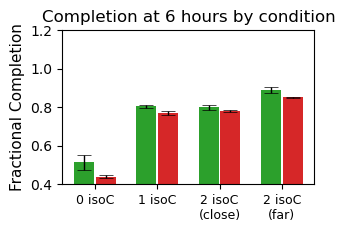

Pairwise t-tests: Triggered vs No Trigger (with Holm correction)
0 isoC: t = 3.244, raw p = 0.07471, Holm p = 0.1494
1 isoC: t = 5.497, raw p = 0.005397, Holm p = 0.02159
2 isoC
(close): t = 2.418, raw p = 0.1124, Holm p = 0.1124
2 isoC
(far): t = 4.984, raw p = 0.0331, Holm p = 0.09931

Omnibus t-tests between pooled conditions (with Holm correction)
0 isoC vs 1 isoC: t = -25.942, raw p = 3.133e-07, Holm p = 6.266e-07
1 isoC vs 2 isoC
(far): t = -16.096, raw p = 2.559e-08, Holm p = 7.676e-08
1 isoC vs 2 isoC
(close): t = -0.746, raw p = 0.4734, Holm p = 0.4734


In [7]:
color_scheme = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

x_labels = ['0 isoC', '1 isoC', '2 isoC\n(close)', '2 isoC\n(far)']
x = np.arange(len(x_labels))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(3.25, 2))

n_timepoints = len(time_points)
offset_scale = 0.00  # slight horizontal wiggle to avoid full occlusion

error_params = dict(ecolor='black', lw=1, capsize=5, capthick= 0.5)

hatches = [None, "/"]
for i in range(n_timepoints-1, -1, -1):
    alpha_val = 1.0
    width_adj = bar_width * 0.92

    # Apply subpixel offset so layers peek out
    offset = (i - (n_timepoints - 1) / 2) * offset_scale

    no_inc = np.array([v[0] for v in both_no_inc[i]])
    e_no_inc = np.array([v[1] for v in both_no_inc[i]])
    trig_inc = np.array([v[0] for v in both_trig_inc[i]])
    e_trig_inc = np.array([v[1] for v in both_trig_inc[i]])

    # Draw No Trigger (left)
    ax.bar(x - bar_width/2 + offset, no_inc, width_adj, yerr=e_no_inc,
           color=color_scheme[2], alpha=alpha_val, hatch = hatches[i], error_kw=error_params)

    # Draw Triggered (right)
    ax.bar(x + bar_width/2 + offset, trig_inc, width_adj, yerr=e_trig_inc,
           color=color_scheme[3], alpha=alpha_val, hatch = hatches[i], error_kw=error_params)

# X and Y axis formatting
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=9)
ax.set_ylim(0.4, 1.2)
ax.set_ylabel("Fractional Completion", fontsize=11)
ax.set_title("Completion at 6 hours by condition", fontsize=12)



plt.savefig("Figures/NAR_MultiIso.svg", dpi=400)
plt.show()

from scipy.stats import ttest_ind_from_stats
import numpy as np

print("Pairwise t-tests: Triggered vs No Trigger (with Holm correction)")

raw_pvals = []
results = []

n = 3  # replicates per condition per incubation state

# 1) Triggered vs no-trigger within each condition
for cond_idx in range(4):
    no_inc_mean = both_no_inc[0][cond_idx][0]
    no_inc_std  = both_no_inc[0][cond_idx][1]

    trig_inc_mean = both_trig_inc[0][cond_idx][0]
    trig_inc_std  = both_trig_inc[0][cond_idx][1]

    t_stat, p_val = ttest_ind_from_stats(
        mean1=no_inc_mean, std1=no_inc_std, nobs1=n,
        mean2=trig_inc_mean, std2=trig_inc_std, nobs2=n,
        equal_var=False  # Welch t-test
    )

    raw_pvals.append(p_val)
    results.append((cond_idx, t_stat, p_val))

# Holm correction for the 4 within-condition tests
m = len(raw_pvals)
sorted_idx = sorted(range(m), key=lambda i: raw_pvals[i])
holm_p = [None] * m

for rank, idx in enumerate(sorted_idx, start=1):
    adj = raw_pvals[idx] * (m - rank + 1)
    holm_p[idx] = min(1.0, adj)

for (cond_idx, t_stat, p_raw), p_adj in zip(results, holm_p):
    print(f"{x_labels[cond_idx]}: t = {t_stat:.3f}, raw p = {p_raw:.4g}, Holm p = {p_adj:.4g}")

print("\nOmnibus t-tests between pooled conditions (with Holm correction)")

# 2) Omnibus comparisons between pooled conditions
#    Here we average no-trigger and triggered within each condition
pairs = [(0, 1), (1, 3), (1, 2)]
raw_pvals_omni = []
results_omni = []

for cond1_idx, cond2_idx in pairs:
    # Condition 1
    c1_no_mean = both_no_inc[0][cond1_idx][0]
    c1_no_std  = both_no_inc[0][cond1_idx][1]
    c1_tr_mean = both_trig_inc[0][cond1_idx][0]
    c1_tr_std  = both_trig_inc[0][cond1_idx][1]

    # Condition 2
    c2_no_mean = both_no_inc[0][cond2_idx][0]
    c2_no_std  = both_no_inc[0][cond2_idx][1]
    c2_tr_mean = both_trig_inc[0][cond2_idx][0]
    c2_tr_std  = both_trig_inc[0][cond2_idx][1]

    # Combine no-trigger and triggered within each condition by simple averaging
    # (means are averaged; variance is averaged in squared space)
    cond1_mean = 0.5 * (c1_no_mean + c1_tr_mean)
    cond1_std  = np.sqrt(0.5 * (c1_no_std**2 + c1_tr_std**2))

    cond2_mean = 0.5 * (c2_no_mean + c2_tr_mean)
    cond2_std  = np.sqrt(0.5 * (c2_no_std**2 + c2_tr_std**2))

    # Treat these as two groups with n*2 effective observations each
    t_stat, p_val = ttest_ind_from_stats(
        mean1=cond1_mean, std1=cond1_std, nobs1=2*n,
        mean2=cond2_mean, std2=cond2_std, nobs2=2*n,
        equal_var=False
    )

    raw_pvals_omni.append(p_val)
    results_omni.append((cond1_idx, cond2_idx, t_stat, p_val))

# Holm correction for the 3 omnibus tests
m2 = len(raw_pvals_omni)
sorted_idx2 = sorted(range(m2), key=lambda i: raw_pvals_omni[i])
holm_p2 = [None] * m2

for rank, idx in enumerate(sorted_idx2, start=1):
    adj = raw_pvals_omni[idx] * (m2 - rank + 1)
    holm_p2[idx] = min(1.0, adj)

for (cond1_idx, cond2_idx, t_stat, p_raw), p_adj in zip(results_omni, holm_p2):
    print(f"{x_labels[cond1_idx]} vs {x_labels[cond2_idx]}:"
          f" t = {t_stat:.3f}, raw p = {p_raw:.4g}, Holm p = {p_adj:.4g}")
